In [45]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

y_train = y_train == 0

In [46]:
from keras.models import Sequential
from keras.layers import Dense

In [47]:
model = Sequential()

#hidden layer
model.add(Dense(100, activation="sigmoid", input_shape=(784,)))

#output layer
model.add(Dense(1, activation="sigmoid"))

#kompilieren des Modells -> effizienter auf der GPU
#optimizer -> nach welchem Verfahren werden die Gewichte aktualisiert?
#sgd = stochastic gradient 
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [48]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [58]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=100,
    batch_size=1000)

Epoch 1/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1073
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1068
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1059
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1056
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1052
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1045
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1042
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1033
Epoch 9/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1028
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1022
Epoch 11/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1014
Epoch 12/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1013
Epoch 13/100
60/60 [=================

In [59]:
print(y_train[17])

True


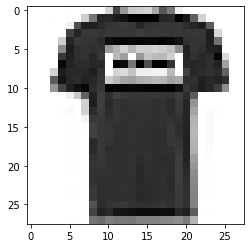

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap="gray_r")
plt.show()

In [61]:
X_train[0].reshape(1, 784).shape

(1, 784)

In [62]:
model.predict(X_train[1].reshape(1, 784))

array([[0.96554315]], dtype=float32)